<a href="https://colab.research.google.com/github/lyd87880938/SmartPetCage/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

print(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/solar_201502_201512_clean.csv').info())
print(pd.read_csv('/content/drive/MyDrive/Colab Notebooks/solar_201502_201512_clean.csv').head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480900 entries, 0 to 480899
Data columns (total 12 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   UTC        480900 non-null  int64  
 1   timestamp  480900 non-null  object 
 2   kW-1       480900 non-null  float64
 3   kW-2       480900 non-null  float64
 4   kW-3       480900 non-null  float64
 5   kW-4       480900 non-null  float64
 6   kW-5       480900 non-null  float64
 7   kW-6       480900 non-null  float64
 8   kW-7       480900 non-null  float64
 9   kW-8       480900 non-null  float64
 10  kW-9       480900 non-null  float64
 11  kW-10      480900 non-null  float64
dtypes: float64(10), int64(1), object(1)
memory usage: 44.0+ MB
None
          UTC    timestamp  kW-1  kW-2  kW-3  ...  kW-6  kW-7  kW-8  kW-9  kW-10
0  1422766800  2/1/15 0:00   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0    0.0
1  1422766860  2/1/15 0:01   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0    0.0
2  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


   t-1  t+1
0  NaN  0.0
1  0.0  0.0
2  0.0  0.0
3  0.0  0.0
4  0.0  0.0
Test MSE: 0.007


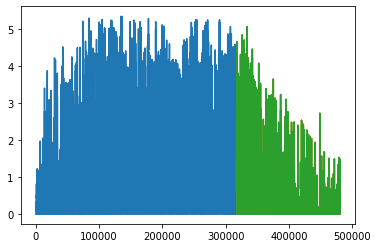

In [19]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
# load dataset
series = read_csv('/content/drive/MyDrive/Colab Notebooks/solar_201502_201512_clean.csv', header=0, index_col="timestamp", usecols=[1,2],)
# prepare data
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
print(dataframe.head(5))
# split into train and test sets
X = dataframe.values
train_size = int(len(X) * 0.66)
train, test = X[1:train_size], X[train_size:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]
# persistence model
def model_persistence(x):
	return x
# walk-forward validation
predictions = list()
for x in test_X:
	yhat = model_persistence(x)
	predictions.append(yhat)
test_score = mean_squared_error(test_y, predictions)
print('Test MSE: %.3f' % test_score)
# plot predictions and expected results
pyplot.plot(train_y)
pyplot.plot([None for i in train_y] + [x for x in test_y])
pyplot.plot([None for i in train_y] + [x for x in predictions])
pyplot.show()